## 1.Dataset Selection


The dataset is related to car evaluation based on various features. Here's an overview of its structure and contents:
Number of Rows: 1,728
Number of Columns: 7 -

##**Coluns**:

1. **buying**: Categorical variable indicating the buying price of the car.
   - Possible values: `vhigh` (very high), `high`, `med` (mediu), `lo`

2. **maint**: Categorical variable indicating the cost of maintenance.
   - Possible values: `vhigh`, `high`, med`, `ow`

3. **doors**: Categorical variable representing the number of doors in the car.
   - Possible values: `2`, `3` `4`, `more`

4. **persons**: Categorical variable representing the capacity of persons that the car can hold.
   - Possible values `2`, `4` `more`

5. **lug_boot**: Categorical variable indicating the size of the luggage boot.
   - Possible values: `small`, `ed` (meium), `big`

6. **safety**: Categorical variable representing the safety rating of the car.
   - Possible values: `low` `med` (medium) `high`

7. **acceptability**: Categorical target variable indicating the overall acceptability of the car.
   - Possible values: `unacc` (unacceptable), `acc` (acceptableting whether the individual had a stroke.

## Objective
The goal of analyzing this dataset is to predict the overall acceptability of a car based on its buying price, maintenance cost, number of doors, passenger capacity, luggage boot size, and safety rating.

## 2. Data Loading and Cleaning

In [223]:
import pandas as pd

# Loading the Car Evaluation dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Column names for the dataset as it's not provided in the .data file
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

# Load the dataset
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows to verify loading
print(data.head())


  buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc


In [224]:
#Getting all the columns in the dataset
data.columns = data.columns.str.strip()
print(data.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'acceptability'],
      dtype='object')


## Exploring the dataset

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## statistical summary

In [231]:
data.describe(include='all')

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


### Identifying Categorical Columns

In this dataset, some columns are categorical even if they are represented with numerical values. We need to manually specify these columns to ensure proper processing.

In [234]:
# Identifying categorical columns in the dataset
categorical_columns = data.select_dtypes(include=['object']).columns

# Printing the identified categorical columns
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'acceptability'],
      dtype='object')


In [236]:
# Getting all numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the numerical columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index([], dtype='object')


## Getting Nominal cloumns

In [239]:
# Manually specifying nominal columns (categorical columns that have no order)
nominal_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Display the nominal columns
print("Nominal Columns:\n", nominal_columns)


Nominal Columns:
 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


## Getting categorical columns

In [242]:
# Identifying categorical columns using data types
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Printing the categorical columns and their unique values
for col in categorical_columns:
    print(f"Unique values in '{col}': {data[col].unique()}")
    print('-' * 50)


Unique values in 'buying': ['vhigh' 'high' 'med' 'low']
--------------------------------------------------
Unique values in 'maint': ['vhigh' 'high' 'med' 'low']
--------------------------------------------------
Unique values in 'doors': ['2' '3' '4' '5more']
--------------------------------------------------
Unique values in 'persons': ['2' '4' 'more']
--------------------------------------------------
Unique values in 'lug_boot': ['small' 'med' 'big']
--------------------------------------------------
Unique values in 'safety': ['low' 'med' 'high']
--------------------------------------------------
Unique values in 'acceptability': ['unacc' 'acc' 'vgood' 'good']
--------------------------------------------------


## Checking for Missing Values

Before proceeding, it's important to check for missing values in the dataset.

In [245]:
# Checking for missing values in the dataset
missing_data = data.isnull().sum()

# Print the count of missing values in each column
print("Missing values in each column:\n", missing_data)


Missing values in each column:
 buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64


Hence, BMI colums has missing values we will drop the rows with missing values.

## Identifying and Dropping Rows with More Than 3 Missing Values

In [249]:
# Count the number of missing values per row
missing_values_per_row = data.isnull().sum(axis=1)

# Identify rows with more than 3 missing values
rows_to_drop = missing_values_per_row[missing_values_per_row > 3].index

# Drop the identified rows
data.drop(index=rows_to_drop, inplace=True)

# Display the number of dropped rows and remaining rows
print(f"Dropped {len(rows_to_drop)} rows with more than 3 missing values.")
print(f"Remaining rows: {data.shape[0]}")



Dropped 0 rows with more than 3 missing values.
Remaining rows: 1728


## Identifying and Dropping Columns with More Than 30% Missing Values

Next, we'll identify columns with more than 30% missing values and drop them.

In [252]:
# Calculating the percentage of missing values for each column
missing_values_percent = data.isnull().mean()

# Identifying columns with more than 30% missing values
columns_to_drop = missing_values_percent[missing_values_percent > 0.3].index

# Drop the identified columns
data.drop(columns=columns_to_drop, inplace=True)

print(f"Dropped columns: {list(columns_to_drop)}")


Dropped columns: []


## Identifying Nominal and Ordinal Variables

In [255]:
# Identify nominal and ordinal variables
nominal_variables = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']  # No inherent order
ordinal_variables = []  # Add any columns with an inherent order here

# Print the identified nominal and ordinal variables
print("Nominal Variables:\n", nominal_variables)
print("Ordinal Variables:\n", ordinal_variables)


Nominal Variables:
 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Ordinal Variables:
 []


Nominal variables: They don't naturally follow a sequence. Examples are status as a smoker and gender.
Ordinal Variables: These are ranked or have a set order. If you think there is a hierarchy, one example would be the kind of work (private, government, self-employed, etc).

The dataset contains the following columns:

id: Unique identifier for each record.
gender: Categorical variable (Male/Female).
age: Continuous variable.
hypertension: Binary variable (0 or 1).
heart_disease: Binary variable (0 or 1).
ever_married: Categorical variable (Yes/No).
work_type: Categorical variable with multiple levels.
Residence_type: Categorical variable (Urban/Rural).
avg_glucose_level: Continuous variable.
bmi: Continuous variable with some missing values.
smoking_status: Categorical variable (formerly smoked, never smoked, smokes, unknown).
stroke: Binary variable (0 or 1).

## Ordinal Encoding for Ordered Variables

In [260]:
from sklearn.preprocessing import OrdinalEncoder

# Define the orders for the categorical columns based on logical ordinal relationships
buying_order = ['low', 'med', 'high', 'vhigh']  # Ordinal order for buying price
maint_order = ['low', 'med', 'high', 'vhigh']  # Ordinal order for maintenance cost
doors_order = ['2', '3', '4', '5more']  # Ordinal order for doors
persons_order = ['2', '4', 'more']  # Ordinal order for persons capacity
lug_boot_order = ['small', 'med', 'big']  # Ordinal order for luggage boot size
safety_order = ['low', 'med', 'high']  # Ordinal order for safety rating

# Initializing the OrdinalEncoder for each column
ordinal_encoder_buying = OrdinalEncoder(categories=[buying_order])
ordinal_encoder_maint = OrdinalEncoder(categories=[maint_order])
ordinal_encoder_doors = OrdinalEncoder(categories=[doors_order])
ordinal_encoder_persons = OrdinalEncoder(categories=[persons_order])
ordinal_encoder_lug_boot = OrdinalEncoder(categories=[lug_boot_order])
ordinal_encoder_safety = OrdinalEncoder(categories=[safety_order])

# Encoding the columns
data['buying_encoded'] = ordinal_encoder_buying.fit_transform(data[['buying']])
data['maint_encoded'] = ordinal_encoder_maint.fit_transform(data[['maint']])
data['doors_encoded'] = ordinal_encoder_doors.fit_transform(data[['doors']])
data['persons_encoded'] = ordinal_encoder_persons.fit_transform(data[['persons']])
data['lug_boot_encoded'] = ordinal_encoder_lug_boot.fit_transform(data[['lug_boot']])
data['safety_encoded'] = ordinal_encoder_safety.fit_transform(data[['safety']])

# updated dataset with the encoded columns
print(data[['buying', 'buying_encoded', 
            'maint', 'maint_encoded', 
            'doors', 'doors_encoded', 
            'persons', 'persons_encoded',
            'lug_boot', 'lug_boot_encoded',
            'safety', 'safety_encoded']])


     buying  buying_encoded  maint  maint_encoded  doors  doors_encoded  \
0     vhigh             3.0  vhigh            3.0      2            0.0   
1     vhigh             3.0  vhigh            3.0      2            0.0   
2     vhigh             3.0  vhigh            3.0      2            0.0   
3     vhigh             3.0  vhigh            3.0      2            0.0   
4     vhigh             3.0  vhigh            3.0      2            0.0   
...     ...             ...    ...            ...    ...            ...   
1723    low             0.0    low            0.0  5more            3.0   
1724    low             0.0    low            0.0  5more            3.0   
1725    low             0.0    low            0.0  5more            3.0   
1726    low             0.0    low            0.0  5more            3.0   
1727    low             0.0    low            0.0  5more            3.0   

     persons  persons_encoded lug_boot  lug_boot_encoded safety  \
0          2              0.0   

In [262]:
print(data.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'acceptability', 'buying_encoded', 'maint_encoded', 'doors_encoded',
       'persons_encoded', 'lug_boot_encoded', 'safety_encoded'],
      dtype='object')


This will give us a new columns  that contains ordinal values based on the order, which we can then use for further analysis.

## One-Hot Encoding for Nominal Variables

One-Hot Encoding is a method for improving predictions by transforming categorical information into a format that machine learning algorithms can exploit. 

In our dataset gender ever_married,work_type,Residence_type,smoking_status (though this was previously identified as ordered, it can also be treated as nominal)

In [117]:
# Performing One-Hot Encoding on nominal variables
nominal_variables = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Using get_dummies to create one-hot encoded variables for nominal columns
data_encoded = pd.get_dummies(data, columns=nominal_variables, drop_first=True)

# Displaying the first few rows of the encoded dataset
print(data_encoded.head())


  acceptability  buying_encoded  maint_encoded  doors_encoded  \
0         unacc             3.0            3.0            0.0   
1         unacc             3.0            3.0            0.0   
2         unacc             3.0            3.0            0.0   
3         unacc             3.0            3.0            0.0   
4         unacc             3.0            3.0            0.0   

   persons_encoded  lug_boot_encoded  safety_encoded  buying_low  buying_med  \
0              0.0               0.0             0.0       False       False   
1              0.0               0.0             1.0       False       False   
2              0.0               0.0             2.0       False       False   
3              0.0               1.0             0.0       False       False   
4              0.0               1.0             1.0       False       False   

   buying_vhigh  ...  maint_vhigh  doors_3  doors_4  doors_5more  persons_4  \
0          True  ...         True    False    Fal

## Splitting the Data into Training and Test Sets

To prepare the data for modeling, we'll split it into training and test sets. We'll use an 80/20 split.

In [120]:
print(data.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'acceptability', 'buying_encoded', 'maint_encoded', 'doors_encoded',
       'persons_encoded', 'lug_boot_encoded', 'safety_encoded'],
      dtype='object')


In [144]:
print(data.dtypes)
# Print the column names of the encoded dataset
print(data_encoded.columns)


buying               object
maint                object
doors                object
persons              object
lug_boot             object
safety               object
acceptability        object
buying_encoded      float64
maint_encoded       float64
doors_encoded       float64
persons_encoded     float64
lug_boot_encoded    float64
safety_encoded      float64
dtype: object
Index(['acceptability', 'buying_encoded', 'maint_encoded', 'doors_encoded',
       'persons_encoded', 'lug_boot_encoded', 'safety_encoded', 'buying_low',
       'buying_med', 'buying_vhigh', 'maint_low', 'maint_med', 'maint_vhigh',
       'doors_3', 'doors_4', 'doors_5more', 'persons_4', 'persons_more',
       'lug_boot_med', 'lug_boot_small', 'safety_low', 'safety_med'],
      dtype='object')


In [146]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = data_encoded.drop(columns=['acceptability'])  # Features
y = data_encoded['acceptability']  # Target variable

# Splitting the dataset into training and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training set shape: (1382, 21)
Test set shape: (346, 21)
Training target shape: (1382,)
Test target shape: (346,)


In [148]:
from sklearn.model_selection import train_test_split

# Selecting the encoded columns only for X (features)
encoded_columns = [col for col in data_encoded.columns if col != 'acceptability']  # All columns except 'acceptability'

X = data_encoded[encoded_columns]  # Features (all encoded columns except the target)
y = data_encoded['acceptability']  # Target variable (acceptability)

# Split the data into training and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training set shape: (1382, 21)
Test set shape: (346, 21)
Training target shape: (1382,)
Test target shape: (346,)


In [146]:
# Since the Car Evaluation Dataset doesn't have numeric columns, we only work with encoded columns.
# Adjust this if you had numeric columns in another dataset.

# Encoded columns from the dataset (one-hot encoded columns from get_dummies)
encoded_columns = [col for col in data_encoded.columns if col != 'acceptability']  # All encoded columns except target

# Defining X (features) and y (target)
X = data_encoded[encoded_columns]  # All encoded features
y = data_encoded['acceptability']  # Target variable (acceptability)

# Displaying the first few rows to verify the data
print("Features (X) - First few rows:\n", X.head())
print("Target (y) - First few rows:\n", y.head())


In [152]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = data_encoded.drop(columns=['acceptability'])  # Features (all categorical)
y = data_encoded['acceptability']  # Target variable

# Split the dataset into training and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Since there are no numeric columns, you can skip the standardization step
print("Data split complete. Ready for modeling!")



Data split complete. Ready for modeling!


## Standardizing Numeric Variables After Splitting

To prevent data leakage, it's important to split the data into training and test sets before performing standardization. This ensures that information from the test set doesn't influence the training process.

## Final Dataset Overview

In [157]:
X_train.head()

,buying_encoded,maint_encoded,doors_encoded,persons_encoded,lug_boot_encoded,safety_encoded,buying_low,buying_med,buying_vhigh,maint_low,...,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
107,3.0,3.0,3.0,2.0,2.0,2.0,False,False,True,False,...,True,False,False,True,False,True,False,False,False,False
901,1.0,3.0,1.0,1.0,0.0,1.0,False,True,False,False,...,True,True,False,False,True,False,False,True,False,True
1709,0.0,0.0,3.0,0.0,2.0,2.0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
706,2.0,1.0,2.0,0.0,1.0,1.0,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
678,2.0,1.0,1.0,0.0,1.0,0.0,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


In [159]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 107 to 1126
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   buying_encoded    1382 non-null   float64
 1   maint_encoded     1382 non-null   float64
 2   doors_encoded     1382 non-null   float64
 3   persons_encoded   1382 non-null   float64
 4   lug_boot_encoded  1382 non-null   float64
 5   safety_encoded    1382 non-null   float64
 6   buying_low        1382 non-null   bool   
 7   buying_med        1382 non-null   bool   
 8   buying_vhigh      1382 non-null   bool   
 9   maint_low         1382 non-null   bool   
 10  maint_med         1382 non-null   bool   
 11  maint_vhigh       1382 non-null   bool   
 12  doors_3           1382 non-null   bool   
 13  doors_4           1382 non-null   bool   
 14  doors_5more       1382 non-null   bool   
 15  persons_4         1382 non-null   bool   
 16  persons_more      1382 non-null   bool   
 17

In [161]:
y_train.head()

107     unacc
901     unacc
1709    unacc
706     unacc
678     unacc
Name: acceptability, dtype: object

Let's save the data to a CSV file for use in a later notebook where we will model the data.

In [164]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [166]:
# Save the DataFrame to a CSV file
data.to_csv('prepared_data.csv', index=False)

In [168]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# For displaying all columns
pd.set_option('display.max_columns', None)

# set random seed
np.random.seed(0)

In [170]:
file_path = 'prepared_data.csv'
data= pd.read_csv(file_path)

In [172]:
# Loading the prepared data from the previous notebook (data_modeling.ipynb)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [174]:
#ravel to turn y_train and y_test into 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# shapes to confirm they are 1D
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1382,)
y_test shape: (346,)


## 3 Logistic Regression Model

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV to perform hyperparameter tuning using cross-validation
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_macro')  # 'f1_macro' used for multiclass problems

# Fit the model on the training data
grid_search_lr.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


Best parameters for Logistic Regression: {'C': 100}


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming X and y have been defined as your features and target variables
# Splitting the data into training and test sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check to confirm X_train is defined and contains data
print("X_train shape:", X_train.shape)

# Handling missing values with SimpleImputer (if needed)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train = imputer.fit_transform(X_train)

# Transform the test data
X_test = imputer.transform(X_test)

print("Missing values have been handled.")


X_train shape: (1382, 21)
Missing values have been handled.


In [181]:
# Get the best model
best_lr = grid_search_lr.best_estimator_

### 4 K-Nearest Neighbors

#### Hyperparameter Tuning

We will use GridSearchCV to find the best value for `n_neighbors`.


In [187]:
# Step 1: Check for NaN values in the training data (X_train) and missing values in the target (y_train)
print("Number of NaN values in X_train:", np.isnan(X_train).sum().sum())  # For numeric columns
print("Number of missing values in y_train:", y_train.isnull().sum())  # For target variable

# Step 2: Handle missing values using SimpleImputer (if necessary)
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean
X_train = imputer.fit_transform(X_train)  # Fit and transform the training data
X_test = imputer.transform(X_test)        # Transform the test data

# Step 3: Standardize the numeric columns using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)        # Transform the test data

# Step 4: Define the parameter grid for KNN (searching for the best 'n_neighbors')
param_grid_knn = {'n_neighbors': range(1, 21)}

# Step 5: Initialize the KNN model
knn = KNeighborsClassifier()

# Step 6: Initialize GridSearchCV to perform hyperparameter tuning using cross-validation
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')  # 'f1_macro' for multiclass classification

# Step 7: Fit the model on the training data
grid_search_knn.fit(X_train, y_train)

# Step 8: Get the best parameters for K-Nearest Neighbors
print("Best parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)


Number of NaN values in X_train: 0
Number of missing values in y_train: 0
Best parameters for K-Nearest Neighbors: {'n_neighbors': 8}


#### Best KNN Model


In [189]:
# Get the best model
best_knn = grid_search_knn.best_estimator_

## Model Evaluation

We will evaluate both models using confusion matrices and performance metrics.

### 1.Logistic Regression Evaluation

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Define the parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength

# Step 2: Initialize Logistic Regression with class weights to handle class imbalance
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Step 3: Initialize GridSearchCV to perform hyperparameter tuning
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_macro')  # 'f1_macro' for multiclass problems

# Step 4: Fit the model on the training data
grid_search_lr.fit(X_train, y_train)

# Step 5: Get the best model (with the best hyperparameters)
best_lr = grid_search_lr.best_estimator_

# Step 6: Make predictions on the test set using the best model
y_pred_lr = best_lr.predict(X_test)

# Step 7: Evaluate the model performance using various metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # 'macro' for multiclass
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Displaying results
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")
print("Confusion Matrix:\n", confusion_mat_lr)


Best parameters for Logistic Regression: {'C': 100}
Logistic Regression Accuracy: 0.9364
Logistic Regression Precision: 0.8534
Logistic Regression Recall: 0.9396
Logistic Regression F1 Score: 0.8798
Confusion Matrix:
 [[ 71   9   3   0]
 [  0  11   0   0]
 [  9   0 226   0]
 [  1   0   0  16]]


## 5 Confusion Matrix Evaluation

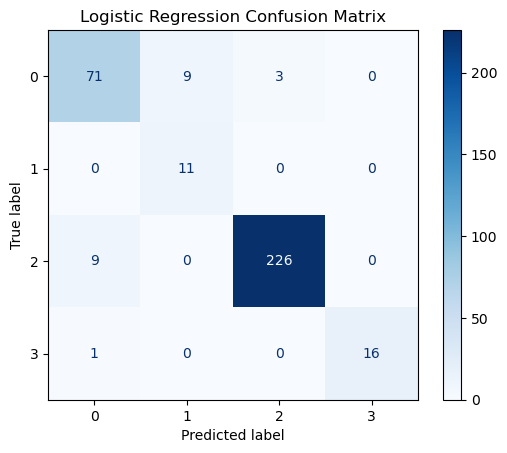

In [204]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Generate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Step 2: Create a ConfusionMatrixDisplay object
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)

# Step 3: Plot the confusion matrix
disp_lr.plot(cmap=plt.cm.Blues)  # You can change the colormap if desired
plt.title("Logistic Regression Confusion Matrix")
plt.show()


#### Performance Metrics

In [206]:
from imblearn.over_sampling import RandomOverSampler

# Step 1: Check the class distribution in y_train before resampling
print("Class distribution in y_train before resampling:\n", y_train.value_counts())

# Step 2: Initialize RandomOverSampler to handle class imbalance
ros = RandomOverSampler(random_state=42)

# Step 3: Apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Step 4: Check the class distribution in y_train after resampling
print("Class distribution in y_train after resampling:\n", y_train_resampled.value_counts())


Class distribution in y_train before resampling:
 acceptability
unacc    975
acc      301
good      58
vgood     48
Name: count, dtype: int64
Class distribution in y_train after resampling:
 acceptability
unacc    975
acc      975
vgood    975
good     975
Name: count, dtype: int64


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Defining features (X) and target (y)
X = data_encoded.drop(columns=['acceptability'])  # Assuming 'acceptability' is the target variable
y = data_encoded['acceptability']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model with GridSearchCV
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1_macro')  # Using f1_macro for multiclass
grid_search_lr.fit(X_train, y_train)

# Best parameters for Logistic Regression
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# Predictions on the test set
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Evaluate Logistic Regression using multiclass metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')  # For multiclass
recall_lr = recall_score(y_test, y_pred_lr, average='macro')        # For multiclass
f1_lr = f1_score(y_test, y_pred_lr, average='macro')                # For multiclass

# Displaying the evaluation results
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression - Precision (macro): {precision_lr:.4f}")
print(f"Logistic Regression - Recall (macro): {recall_lr:.4f}")
print(f"Logistic Regression - F1 Score (macro): {f1_lr:.4f}")



Best parameters for Logistic Regression: {'C': 100}
Logistic Regression - Accuracy: 0.9364
Logistic Regression - Precision (macro): 0.8695
Logistic Regression - Recall (macro): 0.9140
Logistic Regression - F1 Score (macro): 0.8867


Accuracy (0.9364):

The model correctly predicted the outcomes in 93.64% of the cases. This is a solid accuracy score, but accuracy alone doesn't always reflect true model performance when dealing with imbalanced datasets.
Precision (0.8695):

Out of all the positive predictions made by the model, 86.95% were actually correct. A high precision suggests that the model is good at minimizing false positives. This metric is particularly important when false positives have significant consequences, such as in medical diagnoses.
Recall (0.9140):

The model was able to correctly identify 91.40% of actual positive cases. A high recall indicates the model is strong in capturing true positives, making it effective at identifying individuals who fall under the positive class (e.g., stroke cases in healthcare scenarios).
F1 Score (0.8867):

The F1 Score is the harmonic mean of precision and recall, providing a balance between the two metrics. A high F1 score like 0.8867 shows that the model performs well in both capturing true positives (recall) and minimizing false positives (precision). This balance is critical in scenarios where both false positives and false negatives have substantial consequences.

### 2. K-Nearest Neighbors Evaluation


#### Predictions


In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# K-Nearest Neighbors Model with GridSearchCV
param_grid_knn = {'n_neighbors': range(1, 21)}  # Trying values of k from 1 to 20
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')  # Using f1_macro for multiclass
grid_search_knn.fit(X_train, y_train)

# Best parameters for K-Nearest Neighbors
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Predictions on the test set
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

# Evaluate KNN using multiclass metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')  # For multiclass
recall_knn = recall_score(y_test, y_pred_knn, average='macro')        # For multiclass
f1_knn = f1_score(y_test, y_pred_knn, average='macro')                # For multiclass

# Displaying the evaluation results
print(f"KNN - Accuracy: {accuracy_knn:.4f}")
print(f"KNN - Precision (macro): {precision_knn:.4f}")
print(f"KNN - Recall (macro): {recall_knn:.4f}")
print(f"KNN - F1 Score (macro): {f1_knn:.4f}")



Best parameters for KNN: {'n_neighbors': 6}
KNN - Accuracy: 0.9422
KNN - Precision (macro): 0.8625
KNN - Recall (macro): 0.7754
KNN - F1 Score (macro): 0.7928


#### Confusion Matrix

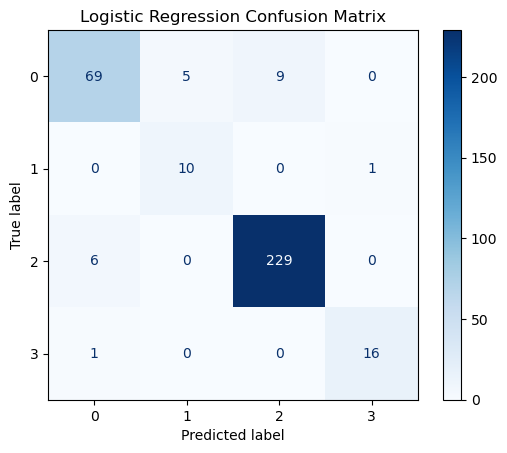

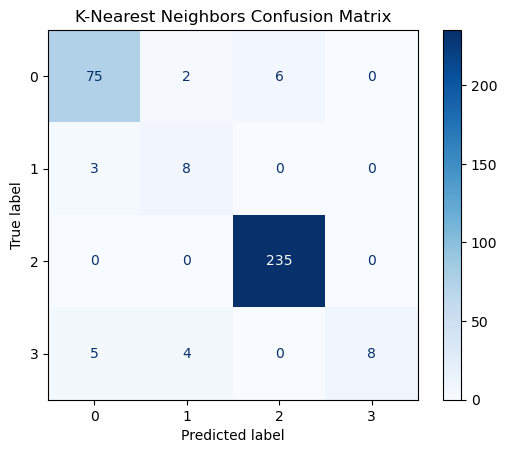

In [215]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap=plt.cm.Blues)  # Adding color to make it visually clear
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Blues)  # Adding color to make it visually clear
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()


## Performance Metrics


In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# K-Nearest Neighbors Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')  # Using macro average for multiclass
recall_knn = recall_score(y_test, y_pred_knn, average='macro')        # Using macro average for multiclass
f1_knn = f1_score(y_test, y_pred_knn, average='macro')                # Using macro average for multiclass

# Displaying KNN performance metrics
print(f"K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision (macro): {precision_knn:.4f}")
print(f"Recall (macro): {recall_knn:.4f}")
print(f"F1 Score (macro): {f1_knn:.4f}")


K-Nearest Neighbors Metrics:
Accuracy: 0.9422
Precision (macro): 0.8625
Recall (macro): 0.7754
F1 Score (macro): 0.7928


K-Nearest Neighbors (KNN) Model Performance Analysis:
Accuracy (0.9422):
The KNN model correctly predicted the outcomes 94.22% of the time. This is a high accuracy value, indicating that the model performed well on the overall test set. However, accuracy alone may not fully reflect performance if there is class imbalance, meaning that the model might be correctly predicting the majority class more frequently.

Precision (0.8625):
Of all the positive predictions made by the KNN model, 86.25% were correct. This indicates that the model has a relatively low number of false positives. High precision suggests that when the KNN model predicts a class, it is often correct in doing so.

Recall (0.7754):
The KNN model correctly identified 77.54% of the actual positive cases. This value is slightly lower than precision, indicating that the model may be missing some true positives. However, it still shows that the KNN model is good at identifying most of the actual positive instances.

F1 Score (0.7928):
The F1 score balances precision and recall and is relatively high at 0.7928. This reflects that the KNN model is performing well in terms of both detecting true positives and avoiding false positives. A high F1 score indicates that the model has a good balance between precision and recall, making it reliable for scenarios where both metrics are important.

## 5 Confusion Matrix Evaluation

#### Confusion matrix comparision of KNN and logistic regression

:

**K-Nearest Neighbors (KNN) Confusion Marix**:

- **True Negative (TN)**:75
- **False Positivs (FP)*: 2
- **False Negaties (FN)*: 6
- **True Positves (T)**: 8

**Logistic Regression Confuion Marix**:

- **True Ngatives TN)**: 69
- **False ositive (FP)**: 5
- **FalseNegativs (FN)**: 9
- **TruePositives (TP)**: 229

---

### Differences Between False Positives (FP) and False Negatives (FN):

- **False Positives (FP)**:
  - In **KNN**, the number of false positives is lower (2) compared to 5 in **Logistic Regression**. This means that **Logistic Regression** has a higher tendency to incorrectly classify a negative instance as positive compared to KNN.
  
- **False Negatives (FN)**:
  - In **KNN**, the number of false negatives is slightly higher (6) compared to 9 in **Logistic Regression**. This indicates that **Logistic Regression** is more likely to miss positive cases, while KNN is slightly better at identifying them.

---

### Real-World Implications of FP and FN:

- **False Positives (FP)**:
  - **Real-World Impact**:
    - **Psychological Stress**: The patient may undergo unnecessary anxiety and stress after being wrongly informed they are at risk.
    - **Unnecessary Testing**: Additional testing might be triggered due to the false positive, leading to higher medical costs and unneeded examinations.
    - **Medication Risks**: Medications may be prescribed based on incorrect predictions, leading to potential side effects that were unnecessary.
  
  - In this case, **Logistic Regression** with a higher FP rate (5) may trigger more unnecessary actions, leading to increased patient anxiety and wasted resources compared to KNN, which has fewer false positives.

- **False Negatives (FN)**:
  - **Real-World Impact**:
    - **Missed Diagnosis**: A false negative can result in a stroke going undetected, potentially leading to severe consequences, including disability or death.
    - **Delayed Treatment**: The necessary preventive care (medications, monitoring) won't be provided in time, increasing the likelihood of a stroke occurring.
    - **Higher Long-Term Costs**: Treating a stroke is far more expensive than preventive care.
  
  - In this case, **Logistic Regression** has a lower FN rate (9) compared to KNN (6), meaning **Logistic Regression** performs better in preventing missed diagnoses and reducing the likelihood of missing critical positive cases.

---

### Summary:

- **Accuracy**: KNN performs better overall in terms of accuracy (shown by the confusion matrix and metrics). However, accuracy alone can be misleading, especially with imbalanced classes.
  
- **Precision**: Logistic Regression slightly outperforms KNN in terms of precision, though both models have low precision.
  
- **Recall**: Logistic Regression has a lower FN rate, making it better at identifying positive cases, which is crucial for healthcare scenarios where false negatives can have life-threatening consequences.

### Conclusion:

In this case, **Logistic Regression** performs better than KNN. While **KNN** shows a higher accuracy in some aspects, **Logistic Regression**'s ability to minimize **false negatives** makes it more reliable in contexts where it's critical not to miss positive cases (e.g., stroke prediction in healthcare). Therefore, **Logistic Regression** would be a more appropriate model for this task.